# 📌 1. Introduction

"""
This notebook explores cleaned clinical PET-CT data from cancer-free individuals.
Data includes Log-transformed organ volumes (Log_V) and Log-transformed standardized uptake values (Log_SUV).
Target: model allometric relationships for REE estimation.

Datasets:
- 325 subjects (targeted_organs_325.csv)
- 51 subjects (targeted_organs_full_brain_51.csv)

In [38]:
# 📂 2. Load Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

# Enable inline plotting
%matplotlib inline
sns.set(style="whitegrid")

# Add scripts to path and import config
sys.path.append(str(Path.cwd().parent / "scripts"))
from config_paths import PUBLIC_DATA_DIR

# Load datasets
df_325 = pd.read_csv(PUBLIC_DATA_DIR / "targeted_organs_325.csv")
df_51 = pd.read_csv(PUBLIC_DATA_DIR / "targeted_organs_full_brain_51.csv")

# Show basic structure
print("325 dataset shape:", df_325.shape)
print("51 subset shape:", df_51.shape)
df_325.head()

325 dataset shape: (325, 49)
51 subset shape: (51, 61)


,Subject ID,Study ID,Age,Sex,Height,BMI,Weight,V(Brain),Log_V(Brain),SUV_A(Brain),...,SUV_A(Fat),Log_SUV_A(Fat),V_bmi(Fat),Log_V_bmi(Fat),V(Bone),Log_V(Bone),SUV_A(Bone),Log_SUV_A(Bone),V_bmi(Bone),Log_V_bmi(Bone)
0,0143bab87a,33529,84.0,M,1.67,27.25,76.0,796.523926,2.901199,4.751014,...,0.484994,-0.314264,719.049009,2.856758,3798.243701,3.579583,1.126720,0.051816,139.385090,2.144216
1,0410759456,20805,78.0,F,1.62,24.77,65.0,980.451980,2.991426,8.428230,...,0.383714,-0.415993,803.330335,2.904894,3183.682147,3.502930,1.079493,0.033220,128.529760,2.109004
2,0410759456,75415,77.0,F,1.62,25.53,67.0,602.145415,2.779701,8.621302,...,0.330700,-0.480566,821.101049,2.914397,3102.852834,3.491761,1.088452,0.036809,121.537518,2.084710
3,05808cf24e,91344,55.0,M,1.83,22.69,76.0,928.771979,2.967909,5.605079,...,0.533152,-0.273149,458.069729,2.660932,4207.379116,3.624012,0.954255,-0.020336,185.428784,2.268177
4,05bed31780,9401,24.0,M,1.80,32.72,106.0,1200.919313,3.079514,9.581957,...,0.330204,-0.481218,1009.178587,3.003968,4109.144815,3.613751,1.520611,0.182018,125.585110,2.098938


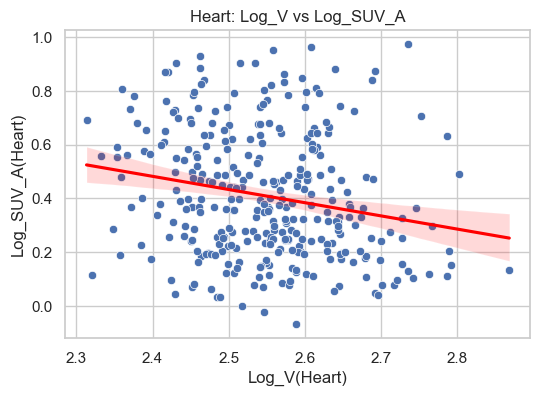

✅ Saved: E:\Thesis-Allometric-REE\plots\Heart_logv_vs_logsuv_a.png


<Figure size 640x480 with 0 Axes>

In [39]:
organ = "Heart"
x_col = f"Log_V({organ})"
y_col = f"Log_SUV_A({organ})"  # ✅ corrected

plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_325[x_col], y=df_325[y_col])
sns.regplot(x=df_325[x_col], y=df_325[y_col], scatter=False, color="red")
plt.title(f"{organ}: Log_V vs Log_SUV_A")
plt.show()

# Save the plot
output_file = PLOTS_DIR / f"{organ}_logv_vs_logsuv_a.png"
plt.savefig(output_file)
print(f"✅ Saved: {output_file}")


In [40]:
from config_paths import PLOTS_DIR
import os

# Ensure the directory exists
if not os.path.exists(PLOTS_DIR):
    os.makedirs(PLOTS_DIR)

# Get organ names from Log_V() column headers
organs = [col.replace("Log_V(", "").replace(")", "") for col in df_325.columns if col.startswith("Log_V(")]
print("Saving plots to:", PLOTS_DIR)
print(organs)

# Loop through each organ and create/save scatter plots
for organ in organs:
    x_col = f"Log_V({organ})"
    y_col = f"Log_SUV_A({organ})"
    
    if x_col in df_325.columns and y_col in df_325.columns:
        print(f"📊 Plotting {organ}...")

        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df_325[x_col], y=df_325[y_col], color="blue", alpha=0.6, s=40)
        sns.regplot(x=df_325[x_col], y=df_325[y_col], scatter=False, color="red", line_kws={"linewidth": 1.5})
        
        plt.title(f"{organ}: Log_V vs Log_SUV", fontsize=12)
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.tight_layout()

        output_file = PLOTS_DIR / f"{organ}_logv_vs_logsuv.png"
        plt.savefig(output_file)
        plt.close()
        
        print(f"✅ Saved: {output_file.name}")


Saving plots to: E:\Thesis-Allometric-REE\plots
['Brain', 'Heart', 'Liver', 'Kidneys', 'Muscles', 'Fat', 'Bone']
📊 Plotting Brain...
✅ Saved: Brain_logv_vs_logsuv.png
📊 Plotting Heart...
✅ Saved: Heart_logv_vs_logsuv.png
📊 Plotting Liver...
✅ Saved: Liver_logv_vs_logsuv.png
📊 Plotting Kidneys...
✅ Saved: Kidneys_logv_vs_logsuv.png
📊 Plotting Muscles...
✅ Saved: Muscles_logv_vs_logsuv.png
📊 Plotting Fat...
✅ Saved: Fat_logv_vs_logsuv.png
📊 Plotting Bone...
✅ Saved: Bone_logv_vs_logsuv.png


In [42]:
# Compute and display Pearson r for each organ
import scipy.stats as stats

correlations = []

for organ in organs:
    x_col = f"Log_V({organ})"
    y_col = f"Log_SUV_A({organ})"
    
    if x_col in df_325.columns and y_col in df_325.columns:
        corr, p = stats.pearsonr(df_325[x_col], df_325[y_col])
        correlations.append({
            "Organ": organ,
            "Pearson r": round(corr, 3),
            "p-value": round(p, 5)
        })

# Display as a DataFrame
pd.DataFrame(correlations).sort_values("Pearson r", ascending=False)


,Organ,Pearson r,p-value
3,Kidneys,0.055,0.32354
2,Liver,0.039,0.48500
0,Brain,-0.026,0.64390
1,Heart,-0.207,0.00018
4,Muscles,-0.279,0.00000
6,Bone,-0.281,0.00000
5,Fat,-0.435,0.00000
